# import

In [1]:

from Utilities.utils import *
# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED4_data_dict = load_h5(os.path.join(current_working_dir,r"ED4_data.h5"))


# figure B

Text(0.5, 1.0, 'Histogram with KDE Curve')

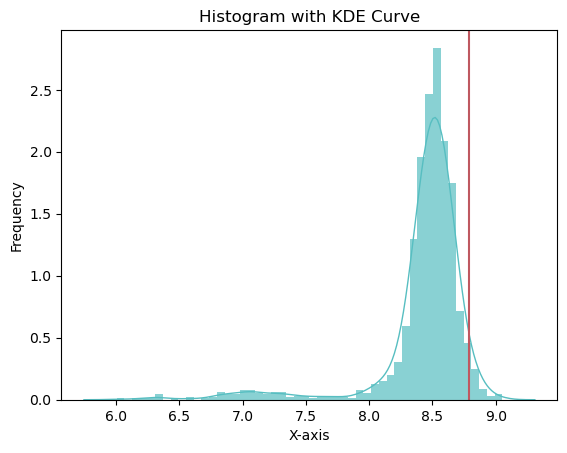

In [2]:
dataset_details = ED4_data_dict['hyper_param_details']

data = dataset_details[:,5]

# Step 1: Create the histogram
hist, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.7, color='#57BEC1', label='Histogram')

# Step 2: Use seaborn's KDE to create the curve that approximates the histogram
sns.kdeplot(data, color='#57BEC1', linewidth=1, label='KDE Curve')

# plot he chosen models log p
plt.axvline(8.791226339279392,c='#BF5860')

plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Histogram with KDE Curve')

# figure C

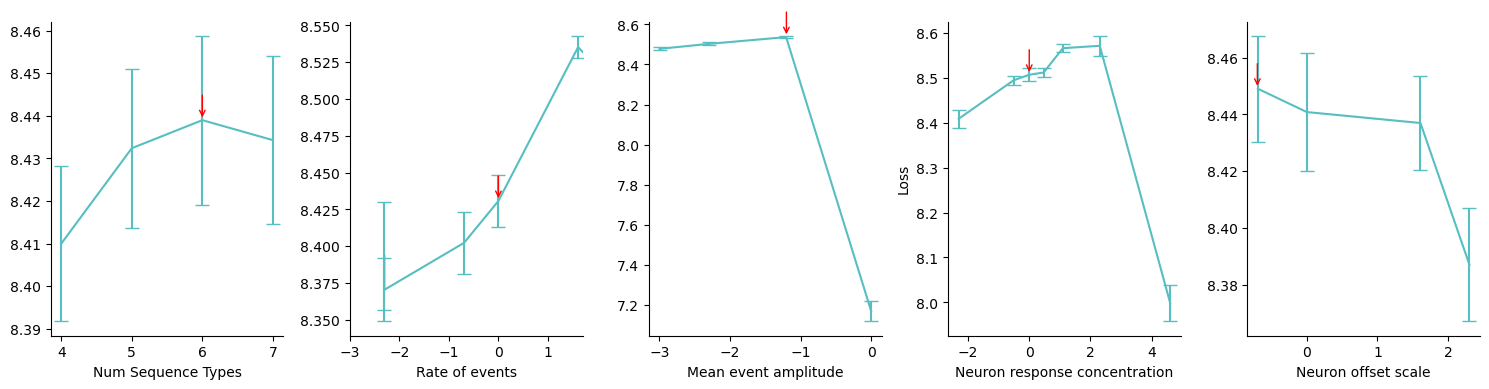

In [3]:
plt.figure(figsize = (15,4))
swept_params = ["Neuron response concentration", "Rate of events", "Neuron offset scale", "Mean event amplitude", "Num Sequence Types"]
to_log = [True, True, True, True, False]
for i,param_choice in enumerate(np.array([4,1,3,0,2])):
    this_param_vals = np.unique(dataset_details[:,param_choice])
    
    means_here = np.zeros([len(this_param_vals)])
    stds_here = np.zeros([len(this_param_vals)])

    for param_setting in range(len(this_param_vals)):
        means_here[param_setting] = np.mean(dataset_details[dataset_details[:,param_choice] == this_param_vals[param_setting], 5])
        stds_here[param_setting] = np.std(dataset_details[dataset_details[:,param_choice] == this_param_vals[param_setting], 5])
        # Convert from standard deviation to standard error on the mean, by dividing by root(n)
        stds_here[param_setting] = stds_here[param_setting]/np.sqrt(np.sum(dataset_details[:,param_choice] == this_param_vals[param_setting]))
    
    plt.subplot(1, 5,i+1)
    if i == 0: # (dont log the first hperparam value - doesnt make snese to)
        plt.errorbar(this_param_vals, means_here, yerr=stds_here, color = '#57BEC1', capsize=5)
        add_arrows(i,this_param_vals,means_here,stds_here)
    else:
        plt.errorbar(np.log(this_param_vals), means_here, yerr=stds_here, color= '#57BEC1', capsize=5)
        add_arrows(i,this_param_vals,means_here,stds_here)
        if i == 1:
            plt.xlim(-3,1.7)
            
    ax = plt.gca()
    ax.spines['right'].set_visible(False)   # remove left line
    ax.spines['top'].set_visible(False)   # remove left line

    plt.xlabel(swept_params[param_choice])
    if param_choice == 0:
        plt.ylabel('Loss')
        
plt.tight_layout()




# figure D

Text(0, 0.5, 'Log p')

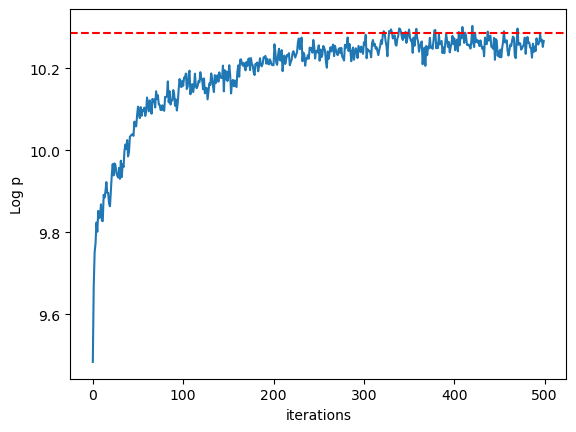

In [4]:
def plot_log_l_curve(log_p_hist_df):
    # find 95% of growth value and when it crossed this
    max_ = max(log_p_hist_df.x1)
    min_ = min(log_p_hist_df.x1)
    growth = max_ - min_
    _prcntile =  max_ - (0.02 * growth)

    ## model log likley hood curve
    plt.plot(log_p_hist_df.x1)
    plt.axhline(y=_prcntile, color='r', linestyle='--')

# load data 
example_log_p_hist_df = ED4_data_dict['example_log_p_hist_df']

plot_log_l_curve(example_log_p_hist_df)
plt.xlabel('iterations')
plt.ylabel('Log p')

# figure E

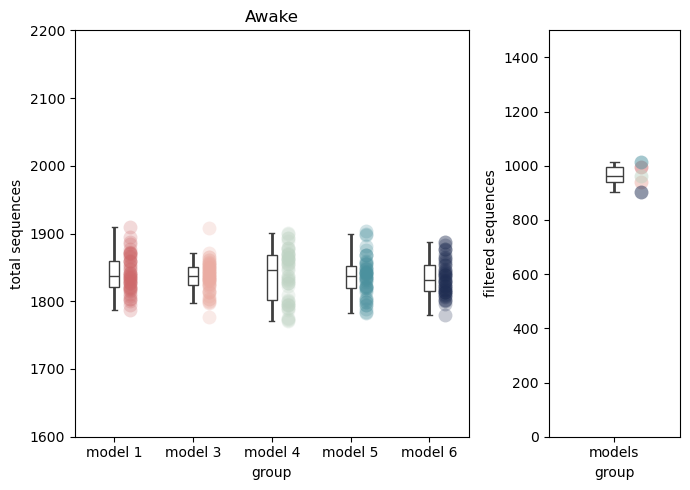

In [5]:

awake_unfiltered = ED4_data_dict['awake_unfiltered']
awake_unfiltered['total sequences'] = awake_unfiltered['total sequences'].astype(float)
awake_filtered   = ED4_data_dict['awake_filtered']

# Setup figure with thinner right plot
# -----------------------------------------------------------
fig, (ax, ax1) = plt.subplots(
    1, 2, figsize=(7, 5),
    gridspec_kw={'width_ratios': [3, 1]}
)

# LEFT PLOT — unfiltered awake sequences
# -----------------------------------------------------------
# Colors for scatter points
colors = ['#CE696B', '#EAACA2', '#BED3C3', '#4B919E', '#202E53']

# Scatter
counter = 0
for c, i in awake_unfiltered.groupby('group'):
    ax.plot([counter + 0.2] * len(i),
            i['total sequences'].values,
            'o', alpha=0.25, color=colors[counter % len(colors)],
            markersize=10, markeredgewidth=0)
    counter +=1 

# Boxplot
sns.boxplot(
    y="total sequences", x="group", data=awake_unfiltered,
    width=.13, showcaps=True, showfliers=False,
    boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 2},
    ax=ax
)
ax.set_ylim(1600, 2200)
ax.set_title("Awake")

# RIGHT PLOT — filtered awake sequences
# -----------------------------------------------------------
df_filt = pd.DataFrame({
    "group": ["models"] * len(awake_filtered),
    "filtered sequences": awake_filtered
})

# Scatter
for i,item in enumerate(awake_filtered):
    ax1.plot(
    [0.2], item,
    'o', alpha=0.5, markersize=10, markeredgewidth=0,
    color= colors[i]
)

sns.boxplot(
    y="filtered sequences", x="group", data=df_filt,
    width=.13, showcaps=True, showfliers=False,
    boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 2},
    ax=ax1
)
ax1.set_ylim(0, 1500)
plt.tight_layout()

# figure F 

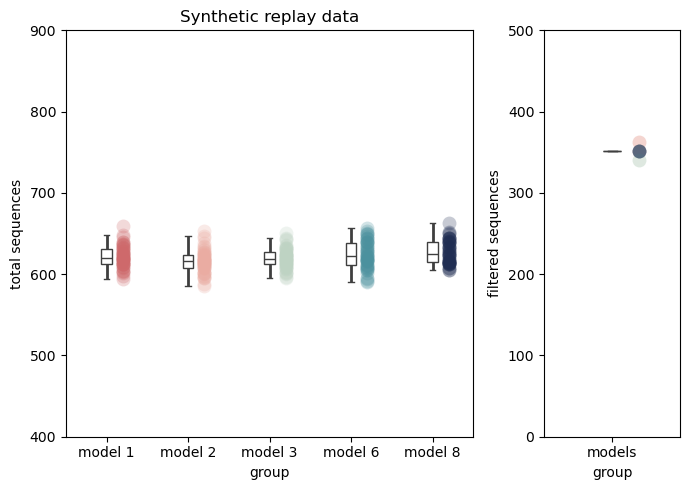

In [6]:

synthetic_unfiltered = ED4_data_dict['synthetic_unfiltered']
synthetic_unfiltered['total sequences'] = synthetic_unfiltered['total sequences'].astype(float)
synthetic_filtered   = ED4_data_dict['synthetic_filtered']

# Setup figure with thinner right plot
# -----------------------------------------------------------
fig, (ax, ax1) = plt.subplots(
    1, 2, figsize=(7, 5),
    gridspec_kw={'width_ratios': [3, 1]}
)

# LEFT PLOT — unfiltered awake sequences
# -----------------------------------------------------------
# Colors for scatter points
colors = ['#CE696B', '#EAACA2', '#BED3C3', '#4B919E', '#202E53']

# Scatter
counter = 0
for c, i in synthetic_unfiltered.groupby('group'):
    ax.plot([counter + 0.2] * len(i),
            i['total sequences'].values,
            'o', alpha=0.25, color=colors[counter % len(colors)],
            markersize=10, markeredgewidth=0)
    counter +=1 

# Boxplot
sns.boxplot(
    y="total sequences", x="group", data=synthetic_unfiltered,
    width=.13, showcaps=True, showfliers=False,
    boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 2},
    ax=ax
)
ax.set_ylim(400, 900)
ax.set_title("Synthetic replay data")

# RIGHT PLOT — filtered awake sequences
# -----------------------------------------------------------
df_filt = pd.DataFrame({
    "group": ["models"] * len(synthetic_filtered),
    "filtered sequences": synthetic_filtered
})

# Scatter
for i,item in enumerate(synthetic_filtered):
    ax1.plot(
    [0.2], item,
    'o', alpha=0.5, markersize=10, markeredgewidth=0,
    color= colors[i]
)

sns.boxplot(
    y="filtered sequences", x="group", data=df_filt,
    width=.13, showcaps=True, showfliers=False,
    boxprops={'facecolor': 'none'}, whiskerprops={'linewidth': 2},
    ax=ax1
)
ax1.set_ylim(0, 500)
plt.tight_layout()

# figure G

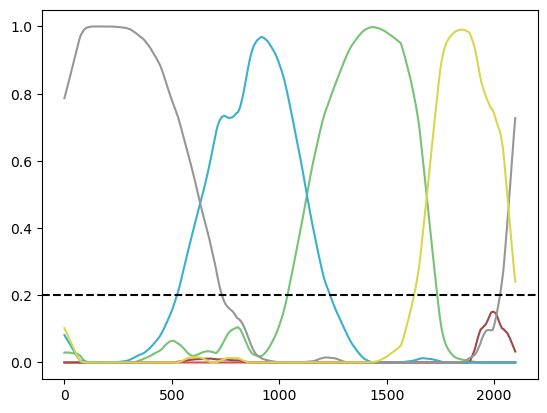

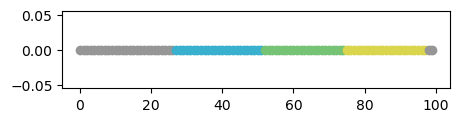

In [ ]:

warped_x= ED4_data_dict['standard_space_warped_x']
smoothed_counts = ED4_data_dict['standard_space_smoothed_seq_counts']
total_smoothed_counts = smoothed_counts.sum(axis=0)

colors = ["#76C375", "#D65252","#A24747", "#38B0CE","#969696","#D9D64D","#FFFFFF"]

# Plot smoothed motif activity
# -----------------------------
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(
        convolve_movmean(smoothed_counts[i] / total_smoothed_counts, 100),
        color=colors[i]
    )

threshold = 0.2
plt.axhline(threshold, color='k', linestyle='--')

# Identify threshold overlaps
# -----------------------------
overlap_positions = []
overlap_positions_standard_space = []
overlap_color = []

n_timepoints = smoothed_counts.shape[1]
linspace_idx = np.linspace(0, n_timepoints - 1, n_timepoints).astype(int)

for seq in range(6):
    # Points where motif explains >20% of activity
    over_thr_mask = (smoothed_counts[seq] / total_smoothed_counts) > threshold

    # Remove short bursts
    start_from_left = False
    idx = 0
    for is_over, grp in groupby(over_thr_mask):
        block = list(grp)
        block_len = len(block)

        if idx == 0 and is_over:
            start_from_left = True

        is_short = block_len < 10
        at_edge = idx + block_len >= len(over_thr_mask)

        if is_over and is_short:
            if (not at_edge) or (at_edge and not start_from_left):
                over_thr_mask[idx:idx + block_len] = False

        idx += block_len

    overlap_color.append(over_thr_mask)
    overlap_positions.append(list(linspace_idx[over_thr_mask]))

    # Convert to standard space coordinates
    overlap_positions_standard_space.append(
        list(linspace_idx[over_thr_mask] / len(over_thr_mask) * 100)
    )

# Compute dominant sequence per bin
# -----------------------------
v_smoothed = [
    convolve_movmean(smoothed_counts[i] / total_smoothed_counts, 100)
    for i in range(len(smoothed_counts))]
# Dominant motif at each timepoint
dominant = [np.argmax(bin_) + 1 for bin_ in conactinate_nth_items(v_smoothed)]
# Compress into 100 bins
compressed_100 = []
for i in range(100):
    mask = (warped_x >= i) & (warped_x <= i + 1)
    compressed_100.append(most_common(list(np.array(dominant)[mask])))

color_ = np.array(colors)[np.array(compressed_100)-1]
# -----------------------------

fig, ax = plt.subplots(figsize=(5, 1))
for idx, col in enumerate(color_):
    ax.plot(idx, 0, 'o', color=col)

plt.show()
